In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, normaltest, skewtest, uniform, expon, norm

In [29]:
# Cargamos la muestra
data = pd.read_csv("./desplazamiento/E5.desplazamientos.txt", names=["duracion"])

In [30]:
# Prueba de normalidad
statistic, p_value = normaltest(data["duracion"])

# Definir un nivel de significancia
alpha = 0.05

print(f"Estadistica: {statistic}, p-value: {p_value}")

if p_value < alpha:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos podrían seguir una distribución normal.")


Estadistica: 1.1550130317103413, p-value: 0.5612962062864881
Los datos podrían seguir una distribución normal.


In [31]:
# Prueba de normalidad
ks_statistic, ks_p_value = shapiro(data["duracion"])

print(f"Estadistica: {ks_statistic}, p-value: {ks_p_value}")

if ks_p_value < alpha:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos podrían seguir una distribución normal.")


Estadistica: 0.999639093875885, p-value: 0.523352861404419
Los datos podrían seguir una distribución normal.


In [32]:
# Prueba de normalidad
statistic, p_value = skewtest(data["duracion"])

print(f"Estadistica: {statistic}, p-value: {p_value}")

if p_value < alpha:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos podrían seguir una distribución normal.")


Estadistica: -0.19557748207354492, p-value: 0.8449408865933918
Los datos podrían seguir una distribución normal.


In [33]:
# Estimar los parámetros de la distribución uniforme
loc, scale = uniform.fit(data["duracion"])

# Prueba de bondad de ajuste
ks_statistic, ks_p_value = kstest(data["duracion"], 'uniform', args=(loc, scale))

print(f"Estadistica: {ks_statistic}, p-value: {ks_p_value}")

if ks_p_value < alpha:
    print("Los datos no siguen una distribución uniforme.")
else:
    print("Los datos podrían seguir una distribución uniforme.")


Estadistica: 0.2177462278558, p-value: 1.2771896112165645e-208
Los datos no siguen una distribución uniforme.


In [34]:
# Estimar los parámetros de la distribución exponencial
scale = expon.fit(data["duracion"])

# Prueba de bondad de ajuste
ks_statistic, ks_p_value = kstest(data["duracion"], 'expon')

print(f"Estadistica: {ks_statistic}, p-value: {ks_p_value}")

if ks_p_value < alpha:
    print("Los datos no siguen una distribución exponencial.")
else:
    print("Los datos podrían seguir una distribución exponencial.")


Estadistica: 0.9587100140001702, p-value: 0.0
Los datos no siguen una distribución exponencial.


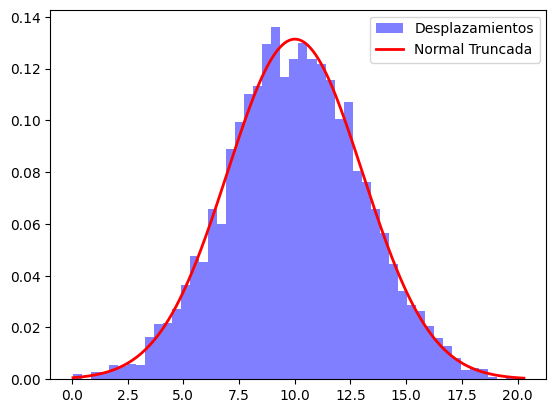

In [35]:
# Histograma de los datos
plt.hist(data["duracion"], bins=50, density=True, alpha=0.5, color='b', label='Desplazamientos')

# Graficar la distribución ajustada
x = np.linspace(min(data["duracion"]), max(data["duracion"]), 1000)
pdf = norm.pdf(x, loc=np.mean(data["duracion"]), scale=np.std(data["duracion"]))
plt.plot(x, pdf, 'r-', lw=2, label='Normal Truncada')

# Mostrar el gráfico
plt.legend()
plt.show()

In [36]:
# Estimamos los parámetros mu y sigma
mu_hat = sum(data["duracion"]) / len(data["duracion"])
sigma_hat = np.sqrt(sum((data["duracion"] - mu_hat) ** 2) / len(data["duracion"]))

print("Mu estimado:", mu_hat)
print("Sigma estimado:", sigma_hat)

Mu estimado: 10.007615178513978
Sigma estimado: 3.0373964893054337


In [37]:
# Ejemplo con x = 1.05
x = 1.05

pdf = (
    1
    / np.sqrt(2 * np.pi * sigma_hat**2)
    * np.exp(-((x - mu_hat) ** 2) / (2 * sigma_hat**2))
)

print(pdf)

0.0016975605788955806


In [38]:
# Ejemplo con x = 10
x = 10

pdf = (
    1
    / np.sqrt(2 * np.pi * sigma_hat**2)
    * np.exp(-((x - mu_hat) ** 2) / (2 * sigma_hat**2))
)

print(pdf)

0.1313430854292659
